# Optymalizacja Bayesowska i Scikit - Optimize

Igor Zubrycki igorzubrycki@gmail.com

Chcemy zoptymalizować funkcje, które:
    
    - są czarnymi skrzynkami, z niedostępnymi gradientami czy opisem analitycznym
    - możemy tylko określać wartość tych funkcji ale nawet to jest obarczone błędem
    - ewaluacja funkcji jest bardzo droga, obliczeniowo czy finansowo
    


To co możemy zrobić to wykonać serię eksperymentów, z pewnym budżetem:

 - faktyczne eksperymenty naukowe: szukamy najlepszego środowiska dla rozwoju mikroorganizmu, szukamy ropy, zmieniamy parametry robota
 - badanie preferencji użytkowników: 
 - optymalizacja hiperparametrów: sieci neuronowe


## Skupmy się na tym ostatnim: optymalizacja hiperparametrów.


W scikit-learn mamy dostępne dwie metody: grid search i random search
    
Pierwsza, tworzy D-wymiarową siatkę parametrów o ustalonej przez nas gęstości 
w danym wymiarze i sukcesywnie ją przeszukuje (która kombinacja parametrów da najlepszy wynik, ta wygrywa)

Druga, dysponując strzela określoną ilość razy, najlepszy strzał wygrywa.

Generalnie, druga metoda daje większą szansę trafienia (Bergstra i Benigo 2012 http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)


## Teoretycznie, jeśli nasze obliczenia są naprawdę tanie, możemy wykorzystać ** zwykłą ** opytmalizację

## Co jednak dzieje się przy **bardzo** drogich funkcjach?

Dobieranie parametrów sieci neuronowej. Jeden pełen przebieg to 1 doba, oddanie klientowi gotowego rozwiązania za miesiąc ;)

**Graduate search ** -- badacz zmienia parametry kierując się *intuicją* szukacjąc dobrej kombinacji dużej ilości parametrów (ilość warstw, normalizacja, ilość neuronów, szybkość uczenia).

Raczej nie będzie przy tym za każdym razem rzucał kostką czy nie będzie metodycznie przeszukiwał wszystkich kombinacji. 



Co w takim razie będzie robił?

- Na początku pewnie sprawdzi parę "sprawdzonych" kombinacji
-  Później **kierując się wynikiem** tych eksperymentów będzie sprawdzał inne kombinacje jednak takie które są podobne do udanych. 
- Czasem jednak spróbuje kombinacji która najbardziej będzie obiegała od tych których zna "dla świętego spokoju"





## Maszyna może to zrobić za nas

Idea optymalizacji Bayesowskiej:

Strategia: próbkuj funkcję, dopasuj do próbek "tymczasową funkcję", przy okazji określ ile nie wiesz.
Tam gdzie jest "szansa na maksimum", próbkuj

In [63]:
### code taken from 

%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

from ipywidgets import interact

In [41]:
def teach_optimizer(n_iter=22):
    space = Space([(-2.0, 2.0)])

    opt = Optimizer(space, n_initial_points=3, acq_func="EI",
                    acq_func_kwargs={'xi': 0.01})
    for _ in range(n_iter):
        suggested = opt.ask()
        y = objective(suggested)
        opt.tell(suggested, y)
    
    return opt

opt_memory=teach_optimizer()

In [136]:
from skopt import Optimizer
from skopt.space import Space
from importlib import reload
import utils
reload(utils)
from utils import plot_optimizer
from utils import plot_main
from utils import plot_optimizer_part

x = np.linspace(-2, 2, 300).reshape(-1, 1)
noise_level = 0.1

# Our 1D toy problem, this is the function we are trying to
# minimize
def objective(x, noise_level=noise_level):
    return (np.sin(5 * x[0]) *
            (1 - np.tanh(x[0] ** 2)) +
            np.random.randn() * noise_level)



def show_result(n_iter=1):
    np.random.seed(123)
    space = Space([(-2.0, 2.0)])

    #opt = Optimizer(space, n_initial_points=3, acq_func="EI",
    #                acq_func_kwargs={'xi': 0.01})
    
    #read from cache
    
    plot_main(opt_memory,x,n_iter=n_iter)
    plt.show()
def show_optimizer(n_iter=3):
    np.random.seed(123)
    #space = Space([(-2.0, 2.0)])

    #opt = Optimizer(space, n_initial_points=3, acq_func="EI",
    #                acq_func_kwargs={'xi': 0.01})
    
    #read from cache
    #opt.yi=opt_memory.yi[0:n_iter]
    #opt.Xi=opt_memory.Xi[0:n_iter]
    #opt.models=opt_memory.models[0:n_iter]
    '''for _ in range(n_iter):
        suggested = opt.ask()
        y = objective(suggested)
        opt.tell(suggested, y)
    '''    
    plot_optimizer_part(opt_memory, x,n_iter=n_iter)
    plt.show()

## Jak można próbkować?

In [137]:
interact(show_result,n_iter=(2, 22))


<function __main__.show_result>

### Do optymalizacji wykorzystujemy 2 funkcje:

Funkcję zastępczą: Gaussian Process
    
Funkcję akwizycji

## Gaussian Process:

Dla każdego wektora x generuje nam wartość średnią funkcji jak i wariancję.

Wartości te generowane są wykorzystując macierz kowariancji która mierzy jak podobne jest wektor x do 
wektorów poprzednio wykorzystywanych.

Z tego, zakładając że funkcja jest w miarę gładka, możemy określić wartość funkcji ( średnią)
dodatkowo dla x leżącego blisko porzednich x, możemy być bardziej pewni wartości funkcji niż dla x leżącego daleko.


## Funkcja akwizycji

Zagadnienie eksploracji/ eksploatacji. 

Dla przykładu: jestem w nowym mieście, idę do jakiejś losowej restauracji, restauracja jest ok. Czy następnego dnia iść do tej samej czy do innej?

Różne metody, pomysł podobny, zamiast tylko wykorzystywać średnią wartość funkcji, wykorzystuję moją pewność co do wyniku. 



In [69]:
interact(show_optimizer,n_iter=(3, 22))


<function __main__.show_optimizer>

## Przykłady funkcji akwizycji

PI( probability of improvement): gdzie jest największa szansa na poprawę?

EI ( expected improvement): gdzie średnio mogę się najbardziej poprawić ?

UCB (upper confidence bounds): (optymizm) gdzie mogę się najwięcej poprawić ?

Thompson sampling - wyciągam jedną funkcję z rodziny GP i szukam jej maksimum/ minimum. 

In [ ]:
Przykłady

## Scikit-optimize (Skopt)

Biblioteka do optymalizacji

Integruje się łatwo ze scikit-learn i z pakietami scipy /numpy

Narzędzia do archiwizacji, wizualizacji wyników

Dość młode narzędzie (niekoniecznie spójna dokumentacja/ przykłady)

Tryby pracy:
    
    - jak optymalizator 
    - jak scikit-learn
    - ask and tell

In [138]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show, xticks, yticks
def rysuj_fkc():
    x = arange(-3.0,3.0,0.1)
    y = arange(-3.0,3.0,0.1)
    X,Y = meshgrid(x, y) # grid of point

    xx=X.flatten()
    yy=Y.flatten()

    Z = z_func(np.array(list(zip(xx, yy)))) # evaluation of the function on the grid
    Z=Z.reshape(X.shape)
    im = imshow(Z,cmap=cm.RdBu) # drawing the function
    # adding the Contour lines with labels
    cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
    clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    colorbar(im) # adding the colobar on the right
    # latex fashion title
    #title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
    xticks(arange(0,60,10),arange(-3,3,1))
    yticks(arange(0,60,10),arange(-3,3,1))
    show()

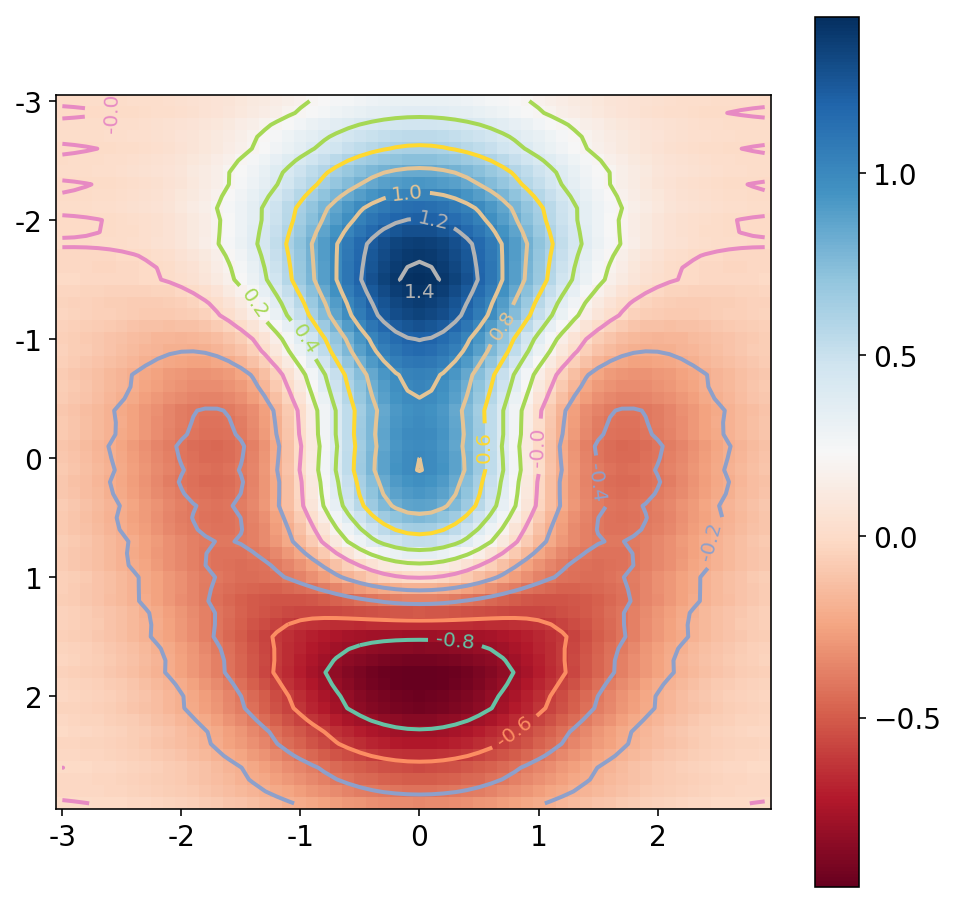

In [139]:
from numpy import exp,arange
# the function that I'm going to plot
def z_func(x):
 x=np.array(x)
 if len(x.shape)==1:
    return ((1-(x[0]**2+x[1]**3))
         *exp(-(x[0]**2+x[1]**2)/2)+0.01*np.sin(20*x[1]))

 return ((1-(x[:,0]**2+x[:,1]**3))
         *exp(-(x[:,0]**2+x[:,1]**2)/2)+0.01*np.sin(20*x[:,1])) 
rysuj_fkc()

In [112]:
res = gp_minimize(z_func, [(-3, 3),(-3,3)])


In [131]:
print("Najlepsza para parametrów {}".format(res.x))
print("Najmniejsza wartość {}".format(res.fun))

Najlepsza para parametrów [0, 2]
Najmniejsza wartość -0.9398958510514954


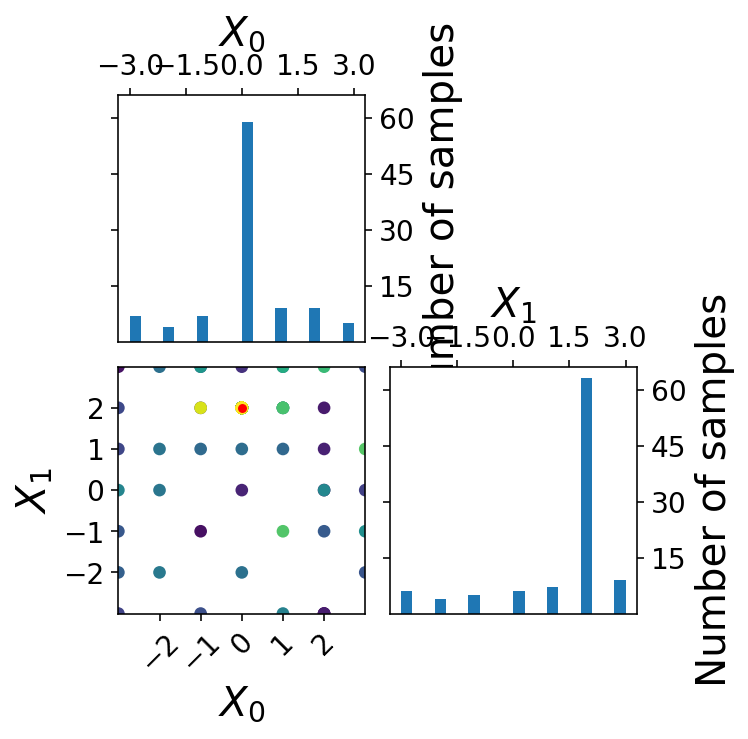

In [134]:
from skopt.plots import plot_evaluations, plot_objective

wy=plot_evaluations(res)

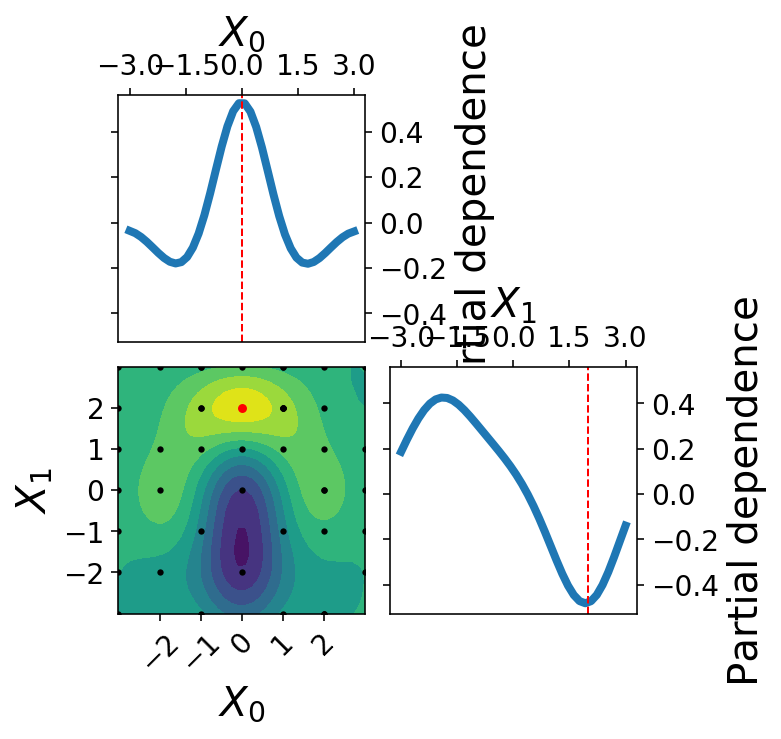

In [135]:
wy=plot_objective(res)

## Optymalizacja hiperparametrów

In [140]:
from skopt import BayesSearchCV
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_digits(10, True) # ręcznie pisane cyfry
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)



In [154]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

opt_random = RandomizedSearchCV(
    SVC(),
    {
        'C': scipy.stats.uniform(1e-6, 1e+6),  
        'gamma': scipy.stats.uniform(1e-6, 1e+1),
        'degree': scipy.stats.randint(1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32
)
opt_random.fit(X_train, y_train)


In [141]:

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),  
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32
)

In [142]:

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.985894580549
test score: 0.982222222222


### Ask and tell

Zasada działania: mogę niezależnie od siebie podawać parę x,y poprzez metodę .tell((x,y))
ew. wykorzystywać sugerowane wektory parametrów x=opt.ask()

In [155]:
from skopt import Optimizer
from skopt import gp_minimize
from skopt.space import Categorical,Integer,Real
xa = Real(-5,5,'uniform')
xb = Real(-5,5,'uniform')
opt = Optimizer([xa,xb],acq_func='gp_hedge', acq_optimizer='auto') #definiuję optymalizator

In [170]:
opt.tell([1,1],z_func([1,1]))

          fun: -0.35874998866416608
    func_vals: array([-0.35874999,  0.11141238, -0.35874999])
       models: []
 random_state: <mtrand.RandomState object at 0x7ff3d40d3c60>
        space: Space([Real(low=-5, high=5, prior=uniform, transform=normalize),
       Real(low=-5, high=5, prior=uniform, transform=normalize)])
        specs: None
            x: [1, 1]
      x_iters: [[1, 1], [1.964691855978618, -2.1386066504962047], [1, 1]]

In [157]:
nowe_miejsce=opt.ask()
print(nowe_miejsce)
opt.tell(nowe_miejsce,z_func(nowe_miejsce))




[1.964691855978618, -2.1386066504962047]


          fun: -0.35874998866416608
    func_vals: array([-0.35874999,  0.11141238])
       models: []
 random_state: <mtrand.RandomState object at 0x7ff3d40d3c60>
        space: Space([Real(low=-5, high=5, prior=uniform, transform=normalize),
       Real(low=-5, high=5, prior=uniform, transform=normalize)])
        specs: None
            x: [1, 1]
      x_iters: [[1, 1], [1.964691855978618, -2.1386066504962047]]

In [ ]:
## ew.
opt.run(z_func)

### Różne typy zmiennych ( kategoryczne, integer etc) 



In [159]:
xa = Real(-5,5,'log-uniform')
xb = Real(-5,5,'uniform')
xc= Categorical(["maly","duzy","sredni"])

## poprzednio zdobyte dane

Co zrobić jak już mieliśmy ileś eksperymentów?

### Stosowanie iteracyjnie ask-tell

In [ ]:
opt.tell(lista_starych_x, lista_starych_y)

#### Jako x0 y0 optymalizatora

In [ ]:
result=gp_minimize(z_func,[xa,xb],verbose=True, x0, y0)

### Wizualizacja

In [164]:
from skopt.benchmarks import branin as branin
from skopt.benchmarks import hart6 as hart6_

from skopt import forest_minimize


# redefined `hart6` to allow adding arbitrary "noise" dimensions
def hart6(x):
    return hart6_(x[:6])

In [166]:
n_calls=40
bounds = [(0., 1.),] * 6

forest_res = forest_minimize(hart6, bounds, n_calls=n_calls,
                             base_estimator="ET", random_state=4)

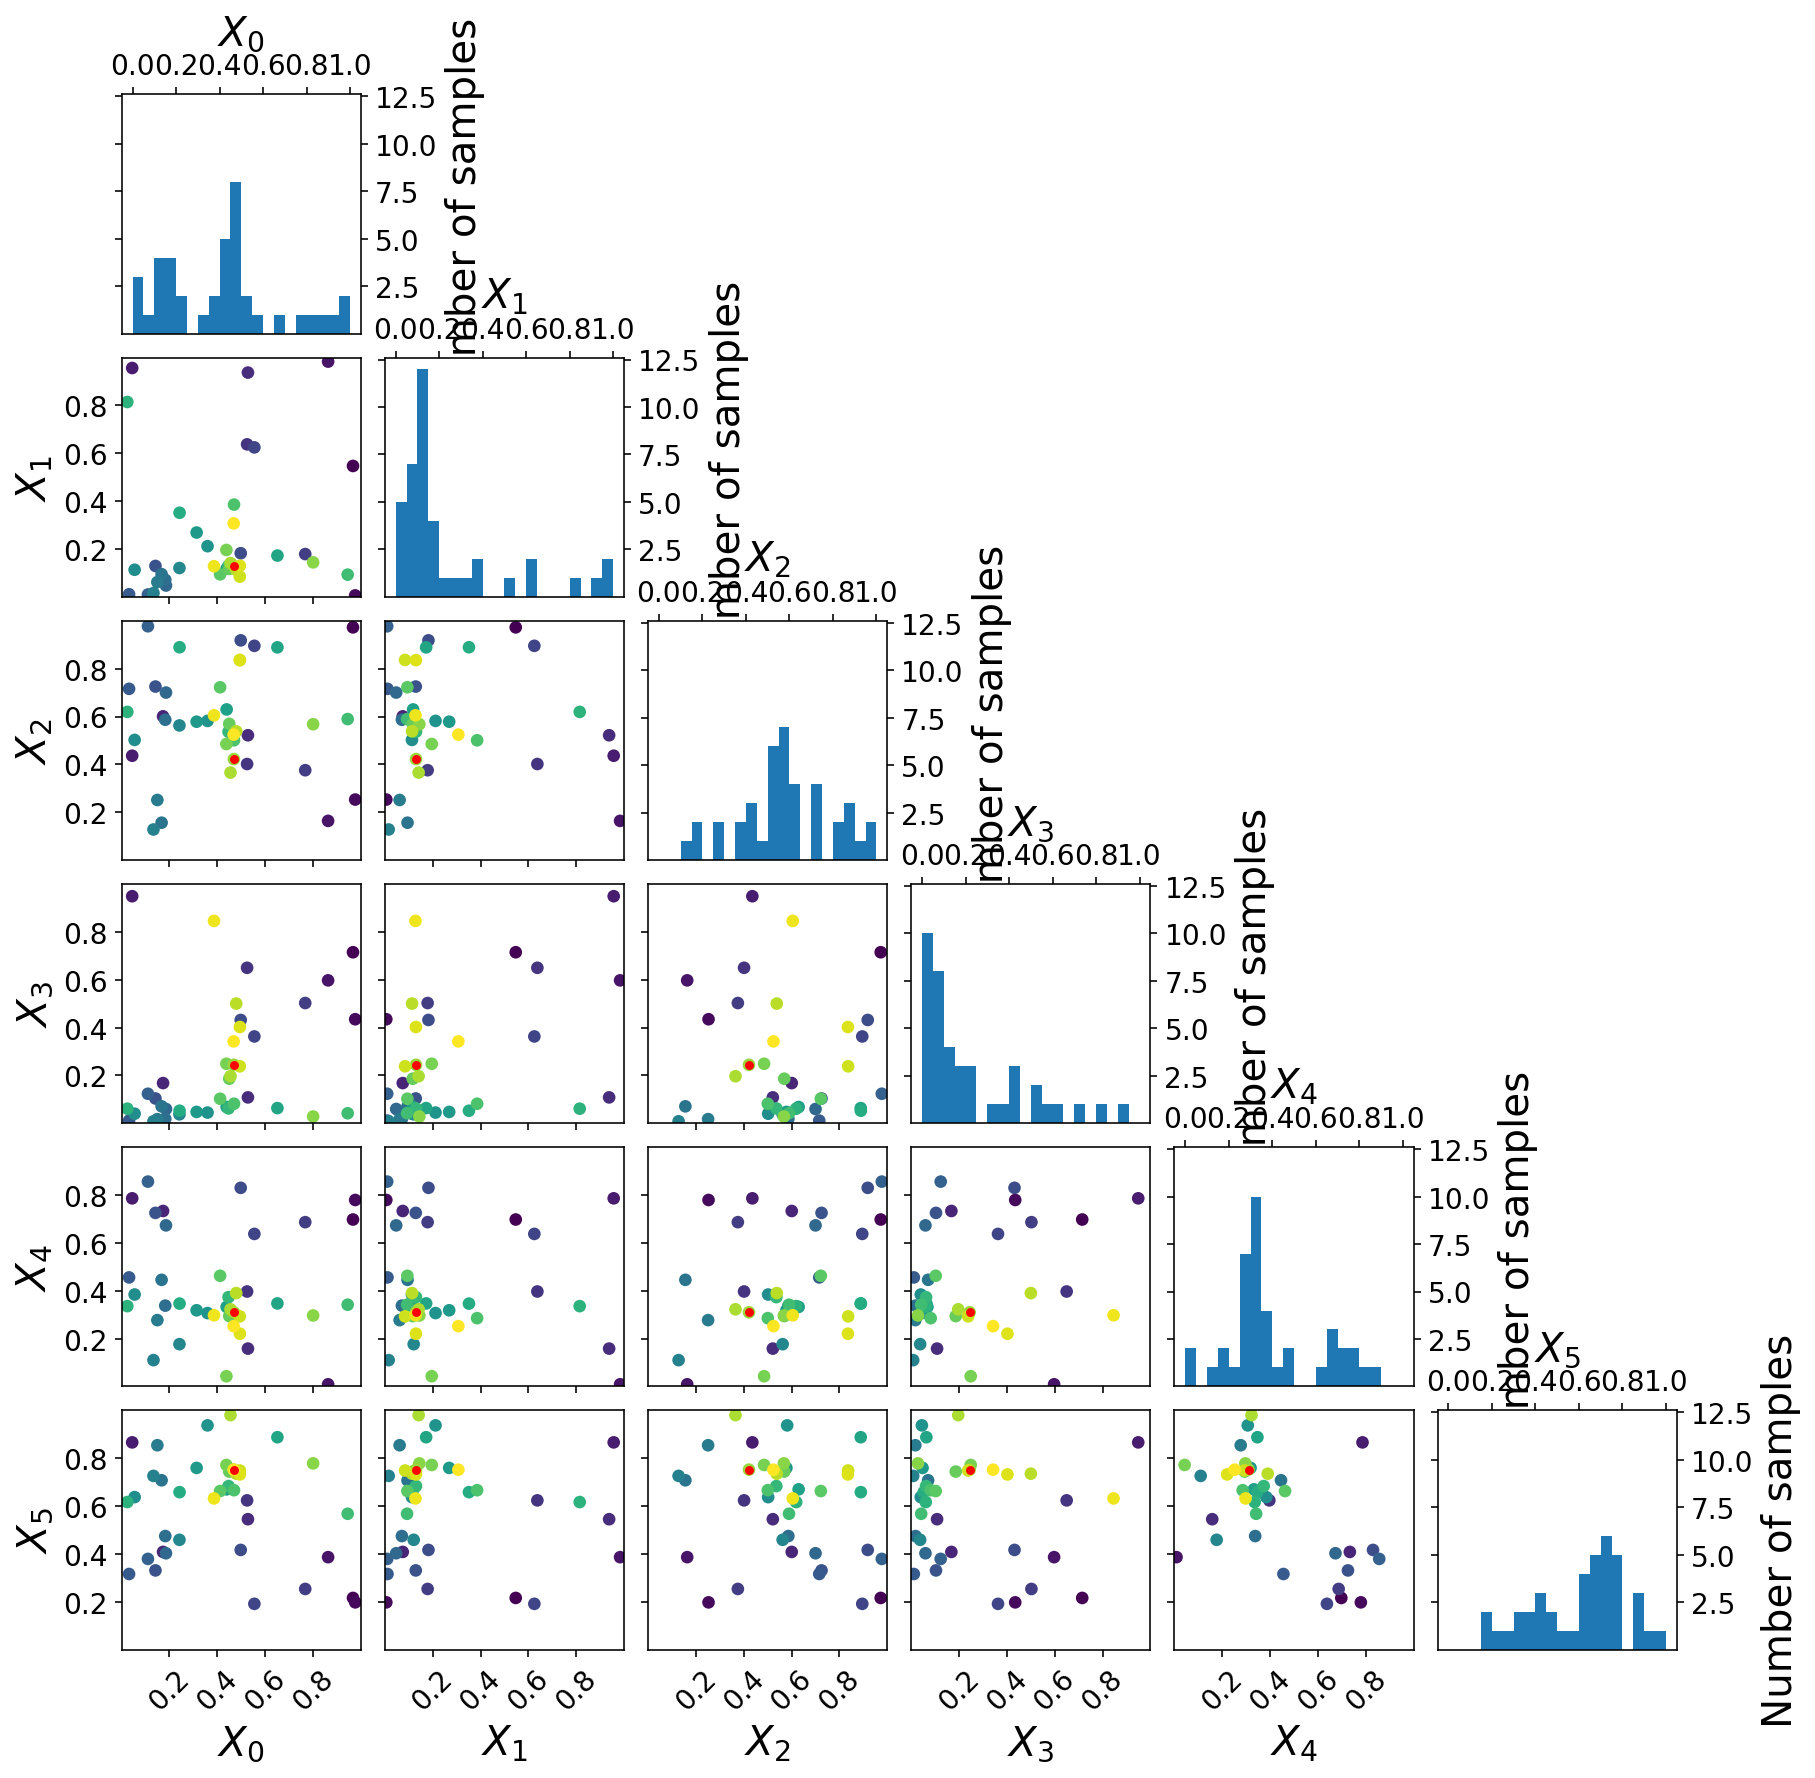

In [167]:
from skopt.plots import plot_evaluations
from skopt.plots import plot_objective
_ = plot_evaluations(forest_res)


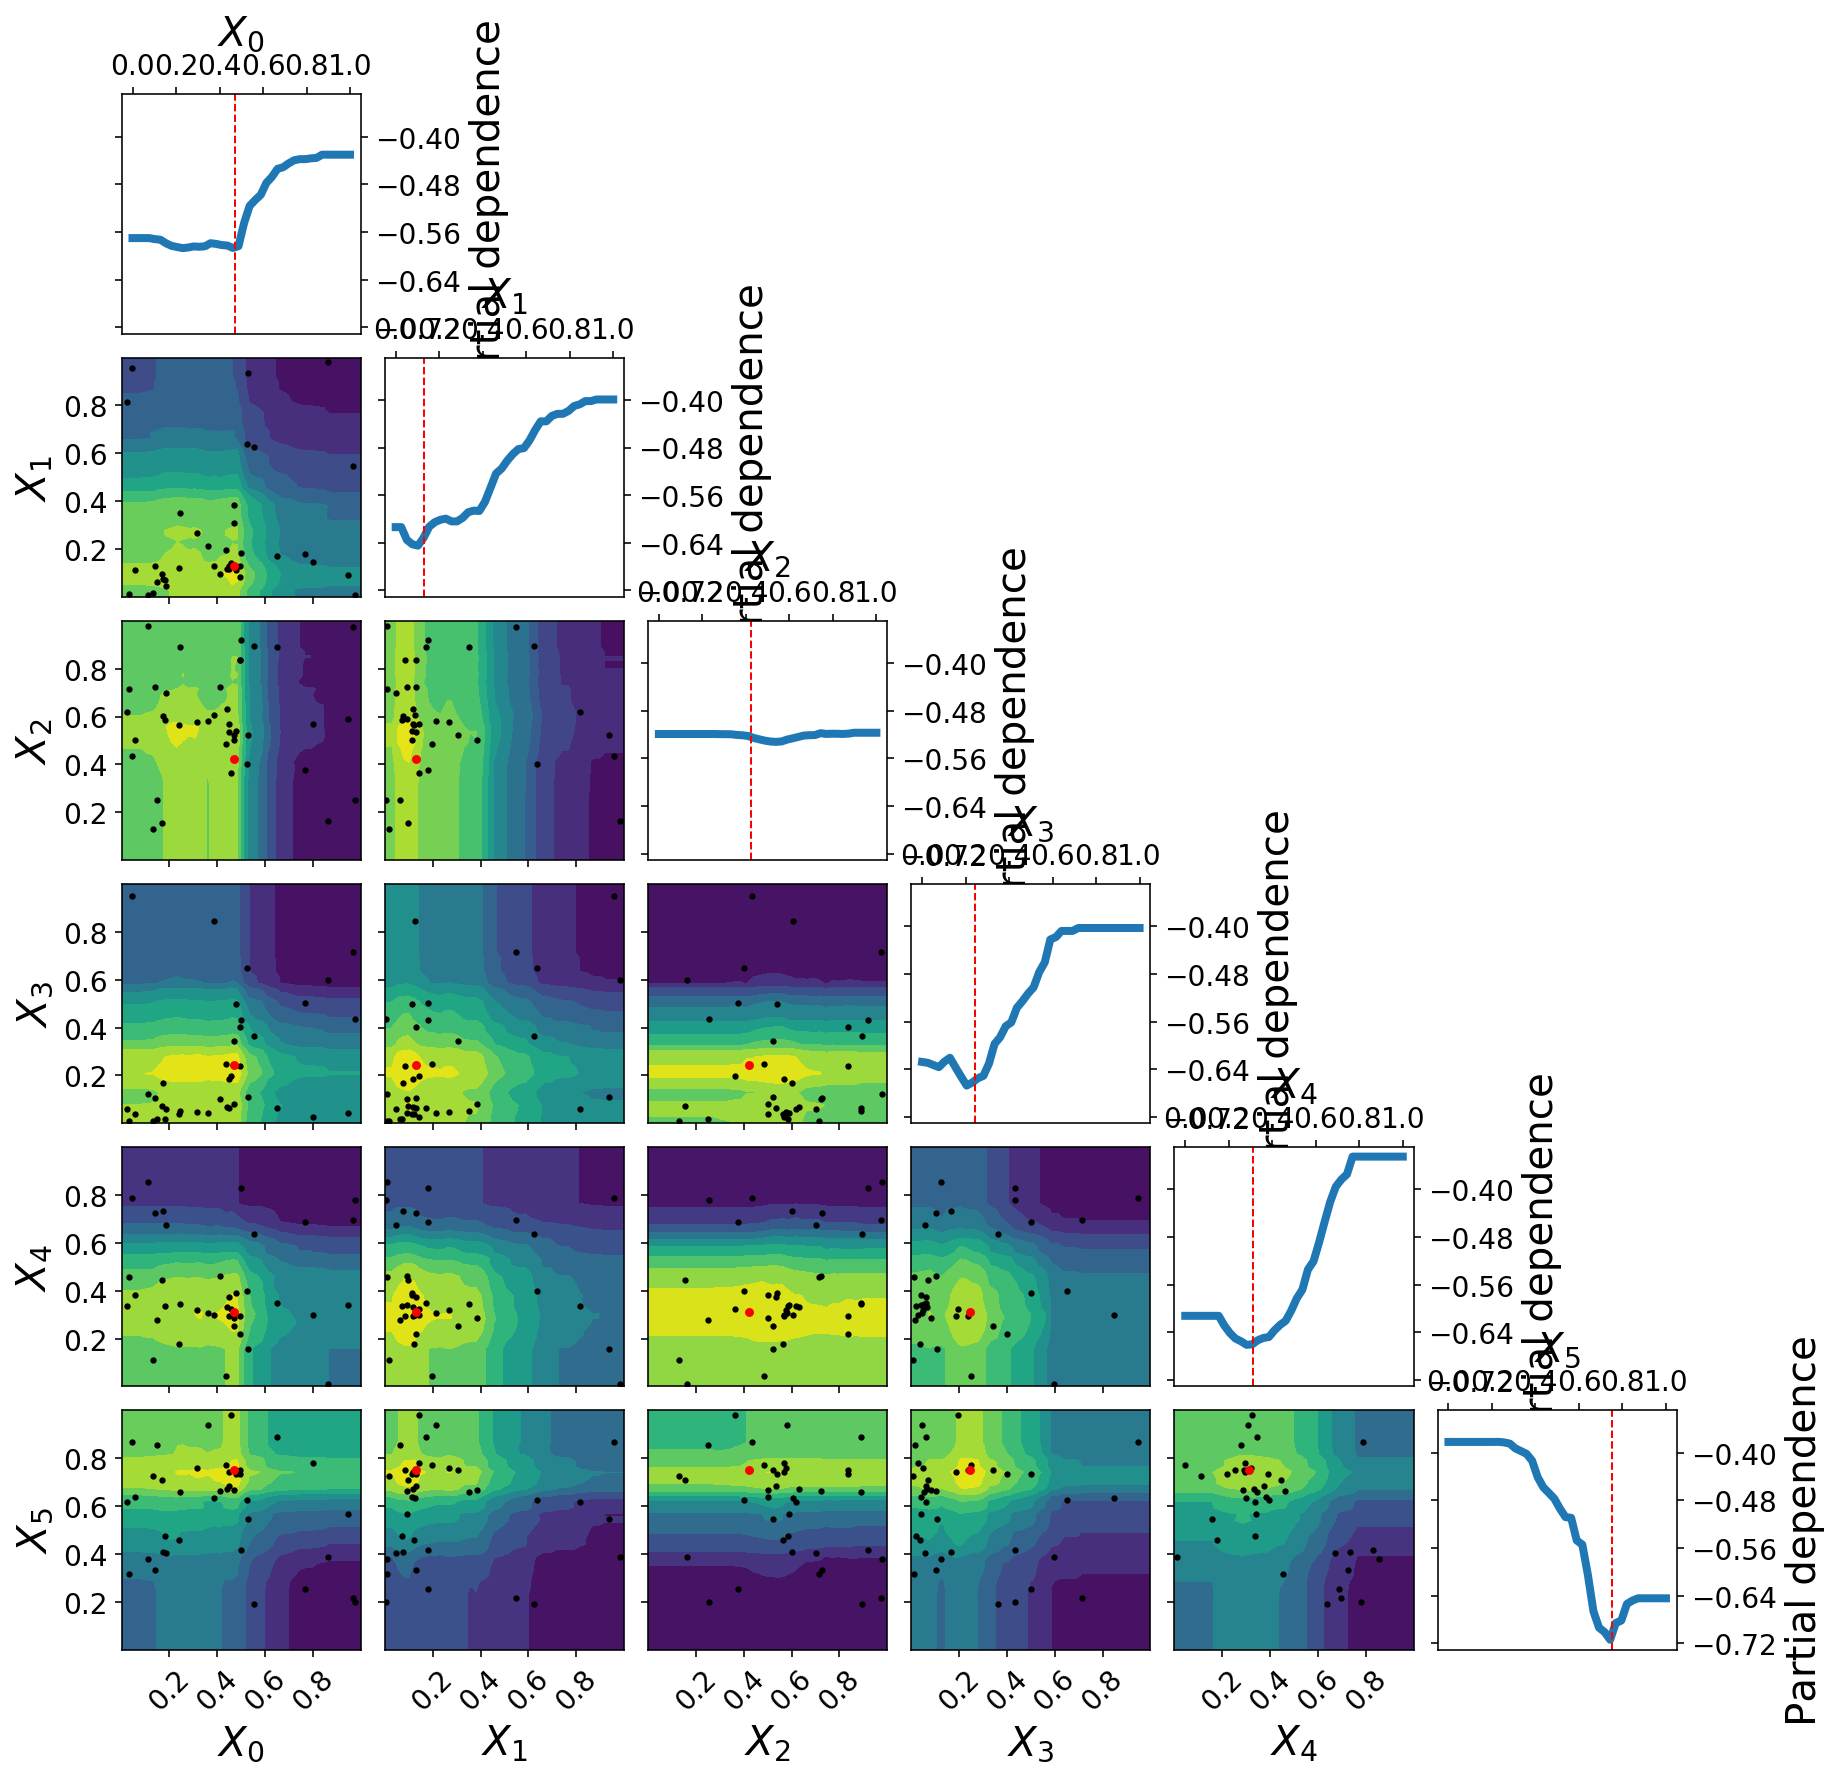

In [168]:
_ = plot_objective(forest_res)

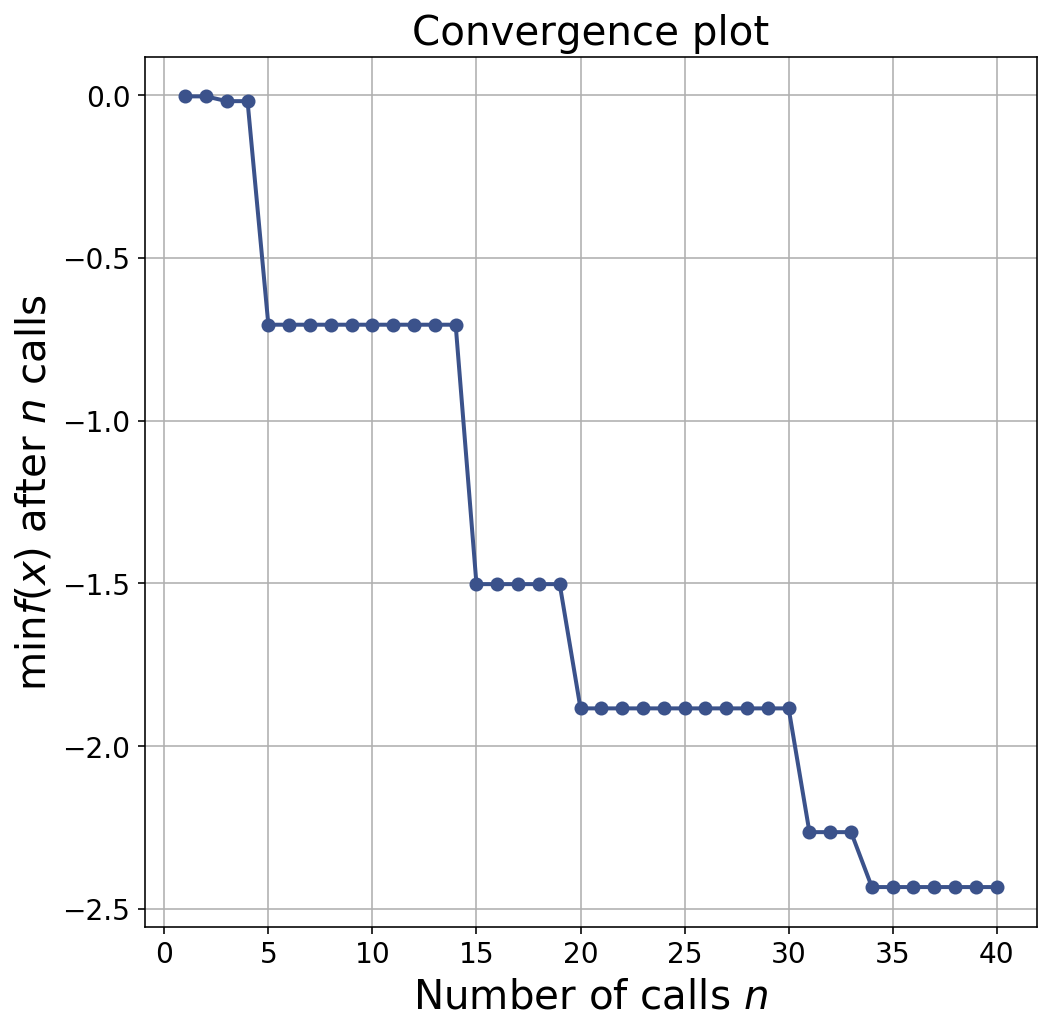

In [169]:
from skopt.plots import plot_convergence

_=plot_convergence(forest_res)

### Inne optymalizatory:

 - forest_minimize
 - gbrt_minimize
 - dummy_minimize

## Wrapup

Optymalizacja Bayesowska pozwala na maksymalne wykorzystanie danych/ budżetu obliczeniowego

W Scikit-optimize dostajemy łatwe do wykorzystania zastępstwo Scikit-learn'owego grid-search i tryb kompletnie offline ask  tell

Nie jest to lek na całe zło same GP są dość cięzkie obliczeniowo i istnieje sporo lepszych optymalizatorów ** jeśli więcej wiemy o funkcji ew jest ona tańsza**



### Więcej informacji

 1. Brochu, Eric, Vlad M. Cora, and Nando De Freitas. **"A tutorial on Bayesian optimization of expensive cost functions, with application to active user modeling and hierarchical reinforcement learning."** arXiv preprint arXiv:1012.2599 (2010).
 2. https://www.youtube.com/watch?v=vz3D36VXefI Machine learning - Bayesian optimization and multi-armed bandits
 3. https://github.com/wildtreetech/bayesian-optimisation 






## Pytania?

igorzubrycki@gmail.com